# Apriori Algorithm 

This notebook demonstrates the use of the Apriori algorithm to generate association rules between the frequent aisles from a transaction dataset.

## Steps

1. **Import Libraries**: Import the necessary libraries for data manipulation and the Apriori algorithm.
2. **Load Dataset**: Load the transaction dataset into a pandas DataFrame.
3. **Generate Frequent Itemsets**: Use the `apriori` function to generate frequent itemsets with a minimum support threshold.
4. **Generate Association Rules**: Use the `association_rules` function to generate association rules from the frequent itemsets, using lift as the metric.
5. **Sort Rules**: Sort the generated rules by the lift metric in ascending order.
6. **Display Rules**: Display the sorted rules.

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

root = 'C:/Users/cabre/PycharmProjects/Market-Basket-Analysis/Data/'

In [2]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

In [3]:
order_products = order_products_prior.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(32434489, 15)

## Merge the order_products DataFrame with the products DataFrame on the product_id column

In [4]:
aisles_counts = order_products.groupby('aisle_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
aisles_counts = aisles_counts.sort_values('frequency', ascending=False).reset_index(drop = True)
aisles_counts

,aisle_id,frequency
0,24,3642188
1,83,3418021
2,123,1765313
3,120,1452343
4,21,979763
...,...,...
129,44,8974
130,102,8581
131,82,8160
132,132,6168


## Merge the order_products DataFrame with the aisles DataFrame on the aisle_id column

In [5]:
transactions_list = order_products.groupby('order_id')['aisle'].apply(list).tolist()
len(transactions_list)

3214874

## Transforms the transactions_list into a one-hot encoded NumPy boolean

In [6]:
transaction_encoder = TransactionEncoder()
transaction_array = transaction_encoder.fit(transactions_list).transform(transactions_list)
transaction_df = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_)
transaction_df

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3214870,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3214871,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3214872,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Generate frequent aisles using the Apriori algorithm

In [7]:
frequent_aisles = apriori(transaction_df, min_support=0.01, use_colnames=True, low_memory=True)
frequent_aisles.head()

,support,itemsets
0,0.043074,(asian foods)
1,0.046157,(baby food formula)
2,0.010239,(bakery desserts)
3,0.076754,(baking ingredients)
4,0.011051,(body lotions soap)


## Association rules between the frequent aisles

In [8]:
rules = association_rules(frequent_aisles, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
12558,"(dry pasta, fresh fruits)","(fresh vegetables, pasta sauce)",0.048427,0.040542,0.010046,0.207450,5.116844,1.0,0.008083,1.210595,0.845512,0.127290,0.173960,0.227621
12563,"(fresh vegetables, pasta sauce)","(dry pasta, fresh fruits)",0.040542,0.048427,0.010046,0.247792,5.116844,1.0,0.008083,1.265041,0.838565,0.127290,0.209511,0.227621
12562,"(fresh fruits, pasta sauce)","(dry pasta, fresh vegetables)",0.042237,0.047496,0.010046,0.237852,5.007825,1.0,0.008040,1.249763,0.835606,0.126070,0.199848,0.224683
12559,"(dry pasta, fresh vegetables)","(fresh fruits, pasta sauce)",0.047496,0.042237,0.010046,0.211515,5.007825,1.0,0.008040,1.214687,0.840220,0.126070,0.176743,0.224683
10347,"(fresh vegetables, canned meals beans)","(fresh fruits, canned jarred vegetables)",0.049893,0.049669,0.011693,0.234359,4.718410,1.0,0.009215,1.241223,0.829448,0.133071,0.194343,0.234887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,(candy chocolate),"(fresh vegetables, fresh fruits)",0.069540,0.317762,0.022144,0.318434,1.002115,1.0,0.000047,1.000986,0.002268,0.060642,0.000985,0.194060
1387,(water seltzer sparkling water),(milk),0.191012,0.244485,0.046774,0.244873,1.001590,1.0,0.000074,1.000515,0.001962,0.120327,0.000514,0.218095
1386,(milk),(water seltzer sparkling water),0.244485,0.191012,0.046774,0.191316,1.001590,1.0,0.000074,1.000376,0.002101,0.120327,0.000375,0.218095
6406,(packaged produce),"(fresh fruits, milk)",0.062011,0.164421,0.010207,0.164600,1.001088,1.0,0.000011,1.000214,0.001159,0.047205,0.000214,0.113339


In [9]:
aisles_counts.merge(aisles, on='aisle_id', how='left').sort_values('frequency', ascending=False)

,aisle_id,frequency,aisle
0,24,3642188,fresh fruits
1,83,3418021,fresh vegetables
2,123,1765313,packaged vegetables fruits
3,120,1452343,yogurt
4,21,979763,packaged cheese
...,...,...,...
129,44,8974,eye ear care
130,102,8581,baby bath body care
131,82,8160,baby accessories
132,132,6168,beauty


In [10]:
# Primero obtenemos los nombres de los pasillos más y menos vendidos
top_aisle_names = ["fresh fruits",
    "fresh vegetables",
    "packaged vegetables fruits",
    "yogurt",
    "packaged cheese"]
less_aisle_names = ["canned fruit applesauce",
    "specialty cheeses",
    "latino foods",
    "frozen meat seafood",
    "breakfast bars pastries",
    "prepared soups salads",
    "meat counter",
    "canned meat seafood",
    "honeys syrups nectars",
    "marinades meat preparation",
    "beers coolers",
    "frozen breads doughs",
    "refrigerated pudding desserts",
    "fresh pasta",
    "protein meal replacements",
    "trail mix snack mix",
    "red wines",
    "bakery desserts",
    "packaged meat",
    "white wines",
    "seafood counter",
    "spirits",
    "baking supplies decor",
    "mint gum",
    "cocoa drink mixes",
    "packaged seafood",
    "frozen dessert",
    "bulk dried fruits vegetables",
    "bulk grains rice dried goods",
    "indian foods",
    "ice cream toppings",
    "kitchen supplies",
    "frozen juice"]

# Función para verificar si un conjunto (frozenset) contiene al menos un elemento de una lista
def contains_any(frozenset_item, target_list):
    return any(item in target_list for item in frozenset_item)

# Filtrar reglas: si antecedent tiene un top, consequent debe tener un less
top_to_less_rules = rules[
    # Antecedent contiene al menos un pasillo top
    rules['antecedents'].apply(lambda x: contains_any(x, top_aisle_names)) &
    # Consequent contiene al menos un pasillo less
    rules['consequents'].apply(lambda x: contains_any(x, less_aisle_names))
]

# Filtrar reglas: si antecedent tiene un less, consequent debe tener un top
less_to_top_rules = rules[
    # Antecedent contiene al menos un pasillo less
    rules['antecedents'].apply(lambda x: contains_any(x, less_aisle_names)) &
    # Consequent contiene al menos un pasillo top
    rules['consequents'].apply(lambda x: contains_any(x, top_aisle_names))
]

# Combinar ambos conjuntos de reglas
filtered_rules = pd.concat([top_to_less_rules, less_to_top_rules]).drop_duplicates()

# Ordenar por lift en orden descendente
filtered_rules = filtered_rules.sort_values('lift', ascending=False)

# Ver resultados
print(f"Total de reglas originales: {len(rules)}")
print(f"Reglas de pasillos top a pasillos less: {len(top_to_less_rules)}")
print(f"Reglas de pasillos less a pasillos top: {len(less_to_top_rules)}")
print(f"Total de reglas filtradas combinadas: {len(filtered_rules)}")


Total de reglas originales: 22082
Reglas de pasillos top a pasillos less: 35
Reglas de pasillos less a pasillos top: 35
Total de reglas filtradas combinadas: 70


In [11]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5728,"(fresh fruits, meat counter)",(fresh vegetables),0.015014,0.444071,0.012317,0.820353,1.847349,1.0,0.005649,3.094573,0.465675,0.027568,0.676854,0.424044
5729,(fresh vegetables),"(fresh fruits, meat counter)",0.444071,0.015014,0.012317,0.027735,1.847349,1.0,0.005649,1.013085,0.825076,0.027568,0.012916,0.424044
5731,(meat counter),"(fresh vegetables, fresh fruits)",0.021480,0.317762,0.012317,0.573398,1.804490,1.0,0.005491,1.599238,0.455613,0.037674,0.374702,0.306079
5726,"(fresh vegetables, fresh fruits)",(meat counter),0.317762,0.021480,0.012317,0.038760,1.804490,1.0,0.005491,1.017977,0.653477,0.037674,0.017660,0.306079
5716,"(fresh fruits, latino foods)",(fresh vegetables),0.014595,0.444071,0.011559,0.791995,1.783489,1.0,0.005078,2.672676,0.445808,0.025854,0.625843,0.409013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,(fresh vegetables),(frozen meat seafood),0.444071,0.021252,0.010340,0.023285,1.095690,1.0,0.000903,1.002082,0.157094,0.022727,0.002078,0.254925
912,(fresh fruits),(marinades meat preparation),0.557027,0.018162,0.010880,0.019533,1.075456,1.0,0.000763,1.001398,0.158389,0.019281,0.001396,0.309295
913,(marinades meat preparation),(fresh fruits),0.018162,0.557027,0.010880,0.599058,1.075456,1.0,0.000763,1.104831,0.071460,0.019281,0.094884,0.309295
210,(fresh fruits),(breakfast bars pastries),0.557027,0.018425,0.010511,0.018870,1.024144,1.0,0.000248,1.000453,0.053220,0.018605,0.000453,0.294673


In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Asumiendo que 'rules' ya está definido y contiene tus reglas de asociación
# Si no lo tienes, reemplaza la siguiente línea con tus datos reales
# rules = association_rules(frequent_items, metric="lift", min_threshold=1)

def crear_grafo_reglas(rules):
    # Crear un grafo dirigido
    G = nx.DiGraph()
    
    # Añadir nodos y aristas
    for i, row in rules.iterrows():
        # Convertir frozensets a strings para usarlos como nodos
        antecedente = ', '.join(list(row['antecedents']))
        consecuente = ', '.join(list(row['consequents']))
        
        # Añadir nodos si no existen
        if not G.has_node(antecedente):
            G.add_node(antecedente)
        if not G.has_node(consecuente):
            G.add_node(consecuente)
        
        # Añadir arista con atributos (lift, confidence, etc.)
        G.add_edge(antecedente, consecuente, 
                   weight=row['lift'],
                   confidence=row['confidence'],
                   support=row['support'])
    
    return G

def visualizar_grafo(G):
    # Configurar tamaño de la figura
    plt.figure(figsize=(12, 10))
    
    # Definir layout
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    # Obtener valores de lift para el grosor y color de las aristas
    lifts = [G[u][v]['weight'] for u, v in G.edges()]
    
    # Normalizar valores para el grosor de la línea
    max_width = 5
    edge_widths = [1 + (lift - min(lifts)) / (max(lifts) - min(lifts)) * max_width for lift in lifts]
    
    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='green', alpha=0.8)
    
    # Dibujar aristas con colores basados en lift
    edges = nx.draw_networkx_edges(G, pos, width=edge_widths, 
                                 edge_color=lifts, edge_cmap=plt.cm.Blues,
                                 arrowsize=20, alpha=0.7)
    
    # Dibujar etiquetas
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', font_color='black')
    
    # Añadir una barra de color para lift
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(lifts), vmax=max(lifts)))
    sm.set_array([])
    cbar = plt.colorbar(sm)
    cbar.set_label('Lift Value')
    
    plt.title('Reglas de Asociación entre Pasillos', fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
# G = crear_grafo_reglas(rules)
# visualizar_grafo(G)

# Si quieres ver las reglas con mayor lift
def mostrar_reglas_importantes(rules, top_n=10):
    print(f"Top {top_n} reglas por lift:")
    print(rules.sort_values('lift', ascending=False).head(top_n)[['antecedents', 'consequents', 'lift', 'confidence']])

# mostrar_reglas_importantes(rules)

# Para un grafo más compacto, podrías filtrar solo las reglas más relevantes
def crear_grafo_top_reglas(rules):
    top_rules = rules.sort_values('lift', ascending=False)
    return crear_grafo_reglas(top_rules)


In [13]:
filtered_rules = filtered_rules[filtered_rules['lift'] > 1.3 ]
test = filtered_rules[filtered_rules['confidence'] > 0.1]
test

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5728,"(fresh fruits, meat counter)",(fresh vegetables),0.015014,0.444071,0.012317,0.820353,1.847349,1.0,0.005649,3.094573,0.465675,0.027568,0.676854,0.424044
5731,(meat counter),"(fresh vegetables, fresh fruits)",0.021480,0.317762,0.012317,0.573398,1.804490,1.0,0.005491,1.599238,0.455613,0.037674,0.374702,0.306079
5716,"(fresh fruits, latino foods)",(fresh vegetables),0.014595,0.444071,0.011559,0.791995,1.783489,1.0,0.005078,2.672676,0.445808,0.025854,0.625843,0.409013
296,(canned fruit applesauce),(yogurt),0.024201,0.263488,0.011219,0.463574,1.759374,1.0,0.004842,1.372999,0.442321,0.040579,0.271667,0.253076
5719,(latino foods),"(fresh vegetables, fresh fruits)",0.021134,0.317762,0.011559,0.546958,1.721285,1.0,0.004844,1.505907,0.428086,0.035314,0.335948,0.291668
1041,(meat counter),(fresh vegetables),0.021480,0.444071,0.016303,0.759004,1.709196,1.0,0.006765,2.306796,0.424038,0.036290,0.566498,0.397858
5844,"(specialty cheeses, fresh fruits)",(fresh vegetables),0.016320,0.444071,0.011929,0.730917,1.645947,1.0,0.004681,2.066011,0.398958,0.026599,0.515976,0.378889
1035,(latino foods),(fresh vegetables),0.021134,0.444071,0.015053,0.712288,1.603998,1.0,0.005668,1.932244,0.384688,0.033441,0.482467,0.373094
5847,(specialty cheeses),"(fresh vegetables, fresh fruits)",0.024004,0.317762,0.011929,0.496935,1.563862,1.0,0.004301,1.356164,0.369425,0.036165,0.262626,0.267237
2959,"(fresh vegetables, canned fruit applesauce)",(fresh fruits),0.013103,0.557027,0.010732,0.819077,1.470445,1.0,0.003434,2.448414,0.324182,0.019185,0.591572,0.419172


C:\Users\cabre\AppData\Local\Temp\ipykernel_24524\3833389031.py:60: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sm)


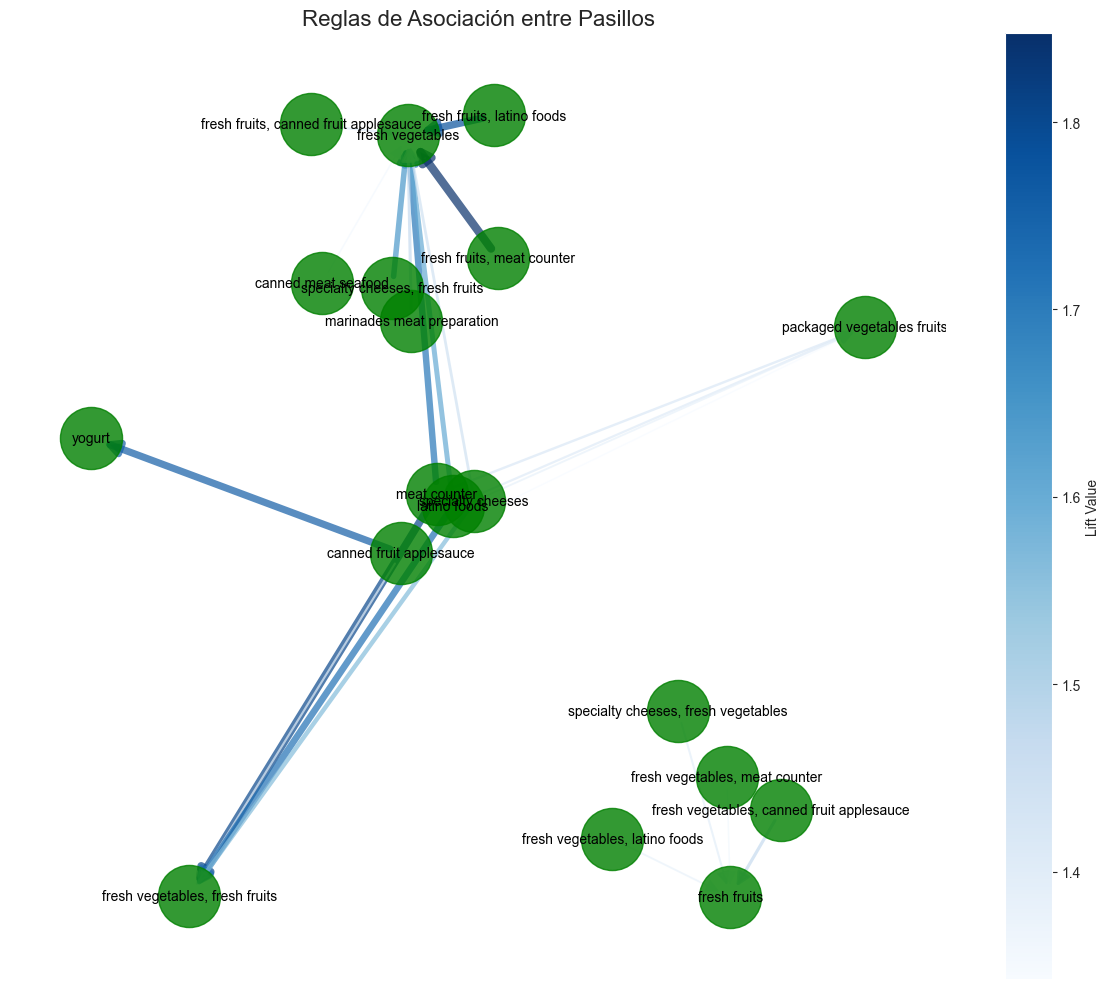

In [14]:
G_top = crear_grafo_top_reglas(test)
visualizar_grafo(G_top)

# Clusters

In [15]:
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

from sklearn.decomposition import PCA

with open(root + "/vecindarios.pkl", "rb") as f:
    vecindarios = pickle.load(f)
print("Vecindarios:", vecindarios)

Vecindarios: [{'specialty cheeses', 'fresh vegetables', 'meat counter', 'canned meat seafood', 'marinades meat preparation', 'canned fruit applesauce', 'packaged cheese', 'packaged vegetables fruits', 'fresh fruits', 'latino foods', 'yogurt'}]


In [16]:
order_products.user_id.nunique()

206209

In [17]:
cross_df = pd.crosstab(order_products.user_id, order_products.aisle)
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [18]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


In [19]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.113443,0.039084,-0.042863,0.018866,-0.088334,-0.104536,-0.116472,0.083630,-0.062197,-0.025989
1,-0.036988,0.108884,-0.066406,-0.123271,0.098846,-0.033957,-0.054748,-0.053369,-0.020309,-0.008399
2,0.064282,0.103962,0.000710,-0.012221,-0.046988,0.112228,-0.029810,0.007895,0.012280,0.001797
3,-0.093210,0.054093,0.001867,-0.003974,-0.071363,-0.019288,-0.025122,-0.038170,0.006274,-0.000690
4,0.094629,-0.037051,-0.024952,-0.021575,0.055368,0.107643,-0.008032,0.103955,0.051600,-0.025797


In [20]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)

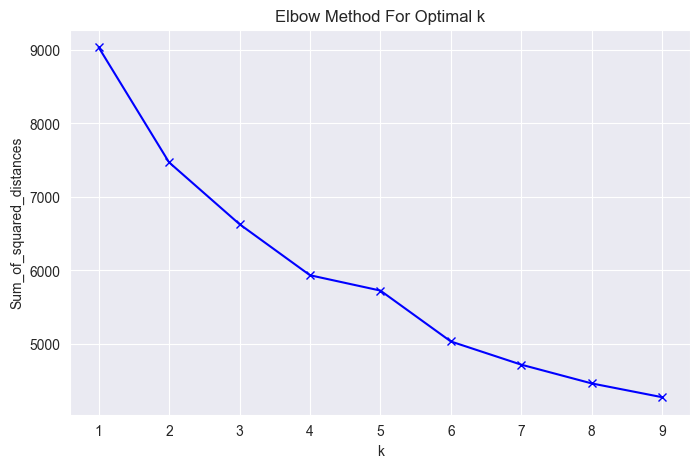

In [21]:
plt.subplots(figsize = (8, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
clusterer = KMeans(n_clusters=5,random_state=42).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
print(centers)

[[ 1.05954881e-01 -7.37460227e-02  1.74308407e-02  3.85220733e-03
   1.75533690e-03 -4.59586807e-03 -9.51726836e-04  1.24570840e-03
  -1.49418429e-04  8.14425335e-04]
 [ 6.63527836e-02  1.03617350e-01 -1.50217658e-03 -3.09212720e-02
  -1.01202206e-02  7.50460247e-03 -5.56142658e-04  4.56613916e-03
  -7.75576024e-04 -1.69551297e-04]
 [-5.75307080e-03  1.31310809e-01  4.93570020e-03  2.29974774e-01
   1.09984540e-01 -2.29199967e-02  3.70322922e-05 -6.44262381e-03
   7.84566056e-03  3.04676115e-03]
 [-7.43869972e-02 -1.09499084e-02 -2.69019664e-02 -6.81671971e-03
  -6.88680945e-03  1.43589093e-03  5.25513669e-04 -2.57957339e-03
  -3.02615764e-04 -4.24264799e-04]
 [-1.99077205e-01  1.61988166e-02  3.19564889e-01 -3.15369809e-02
   1.87810490e-02  6.15978818e-04  4.15300777e-03  1.10649297e-02
   1.09335668e-03 -3.90997386e-03]]


In [23]:
temp_df = df_pca.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = c_preds
temp_df.head()

C:\Users\cabre\AppData\Local\Temp\ipykernel_24524\4221584760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster'] = c_preds


,pc1,pc2,cluster
0,-0.113443,0.039084,3
1,-0.036988,0.108884,1
2,0.064282,0.103962,1
3,-0.093210,0.054093,3
4,0.094629,-0.037051,0


C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


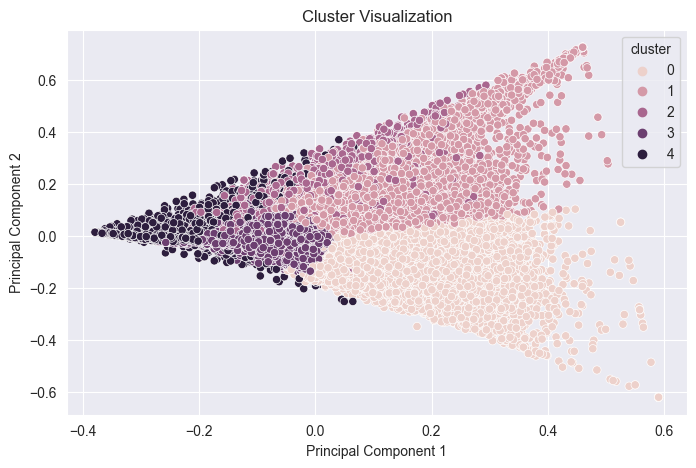

In [24]:
fig, ax = plt.subplots(figsize = (8, 5))
ax = sns.scatterplot(data = temp_df, x = "pc1", y = "pc2", hue = "cluster")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Cluster Visualization")
plt.show();

# Top Aisles per Cluster

In [25]:
cross_df['cluster'] = c_preds

cluster1 = cross_df[cross_df.cluster == 0]
cluster2 = cross_df[cross_df.cluster == 1]
cluster3 = cross_df[cross_df.cluster == 2]
cluster4 = cross_df[cross_df.cluster == 3]
cluster5 = cross_df[cross_df.cluster == 4]

In [26]:
cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 37.078983
fresh fruits                     21.659011
packaged vegetables fruits       11.983962
yogurt                            6.120819
packaged cheese                   4.995021
fresh herbs                       4.156720
milk                              3.978513
soy lactosefree                   3.697907
frozen produce                    3.294047
water seltzer sparkling water     3.071081
dtype: float64

In [27]:
cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     35.687668
fresh vegetables                 15.195611
packaged vegetables fruits       12.192078
yogurt                           10.015448
milk                              6.002656
packaged cheese                   5.185424
soy lactosefree                   3.795105
water seltzer sparkling water     3.641196
bread                             3.226996
chips pretzels                    3.162007
dtype: float64

In [28]:
cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
packaged produce                 18.355877
fresh fruits                     10.900314
packaged vegetables fruits        4.236706
fresh vegetables                  3.101571
water seltzer sparkling water     1.720176
milk                              1.615588
packaged cheese                   1.542929
frozen produce                    1.146700
chips pretzels                    1.140918
nuts seeds dried fruit            1.034318
dtype: float64

In [29]:
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     9.661037
fresh vegetables                 7.537387
yogurt                           7.164005
packaged vegetables fruits       5.958642
packaged cheese                  4.914385
chips pretzels                   4.476413
milk                             4.233753
water seltzer sparkling water    4.098989
refrigerated                     3.250643
ice cream ice                    3.096415
dtype: float64

In [30]:
cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
water seltzer sparkling water    20.909533
fresh fruits                      3.283551
soft drinks                       2.802056
yogurt                            2.221869
energy granola bars               1.528785
tea                               1.318318
chips pretzels                    1.317757
milk                              1.310654
packaged vegetables fruits        1.209907
soy lactosefree                   1.068785
dtype: float64

# Test

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import random
import seaborn as sns
from collections import defaultdict
import networkx as nx

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

class StoreLayoutSimulator:
    def __init__(self, aisles_data, association_rules, clusters_data):
        self.aisles_data = aisles_data
        self.association_rules = association_rules
        self.clusters_data = clusters_data
        self.grid_size = (31, 32)  # Tamaño similar a tu imagen
        self.layout_grid = np.zeros(self.grid_size)
        self.aisle_positions = {}
        self.entrance = (0, 15)
        self.exit = (0, 25)
        
        # Crear el layout inicial
        self._create_store_layout()
        
    def _create_store_layout(self):
        """Crea el layout de la tienda basado en las reglas de asociación"""
        
        # Definir pasillos (áreas grises en tu imagen)
        # Pasillos horizontales
        for i in range(2, 30, 3):
            for j in range(1, 31):
                self.layout_grid[i, j] = 1  # 1 = pasillo
                
        # Pasillos verticales principales
        for i in range(1, 30):
            for j in [5, 10, 15, 20, 25]:
                self.layout_grid[i, j] = 1
        
        # Perímetro para productos frescos (fresh fruits, fresh vegetables)
        for j in range(32):
            self.layout_grid[1, j] = 2  # 2 = zona de productos frescos
            self.layout_grid[29, j] = 2
        for i in range(1, 30):
            self.layout_grid[i, 1] = 2
            self.layout_grid[i, 30] = 2
            
        # Posicionar productos basándose en reglas de asociación
        self._position_products_with_associations()
    
    def _position_products_with_associations(self):
        """Posiciona productos considerando las reglas de asociación"""
        
        # Productos principales con sus posiciones estratégicas
        key_products = {
            'fresh fruits': (1, 8),
            'fresh vegetables': (1, 22),
            'meat counter': (15, 30),
            'yogurt': (8, 15),
            'packaged cheese': (11, 15),
            'latino foods': (20, 5),
            'specialty cheeses': (14, 25),
            'canned fruit applesauce': (23, 10),
            'packaged vegetables fruits': (1, 15),
            'milk': (26, 20)
        }
        
        # Asignar posiciones
        for product, position in key_products.items():
            self.aisle_positions[product] = position
            self.layout_grid[position] = 3  # 3 = producto específico
    
    def simulate_customer_journey(self, customer_cluster, shopping_list=None):
        """Simula el recorrido de un cliente basado en su cluster y reglas de asociación"""
        
        if shopping_list is None:
            # Generar lista de compras basada en el cluster
            shopping_list = self._generate_shopping_list(customer_cluster)
        
        # Inicializar recorrido
        journey = [self.entrance]
        current_position = self.entrance
        visited_products = []
        
        # Ordenar lista de compras usando reglas de asociación
        optimized_list = self._optimize_shopping_order(shopping_list)
        
        for product in optimized_list:
            if product in self.aisle_positions:
                target_position = self.aisle_positions[product]
                
                # Calcular ruta desde posición actual al producto
                path = self._calculate_path(current_position, target_position)
                journey.extend(path[1:])  # Excluir posición actual
                
                visited_products.append(product)
                current_position = target_position
                
                # Aplicar reglas de asociación para productos adicionales
                additional_products = self._apply_association_rules(product, visited_products)
                for add_product in additional_products:
                    if add_product in self.aisle_positions and add_product not in visited_products:
                        add_position = self.aisle_positions[add_product]
                        add_path = self._calculate_path(current_position, add_position)
                        journey.extend(add_path[1:])
                        visited_products.append(add_product)
                        current_position = add_position
        
        # Ir a la salida
        exit_path = self._calculate_path(current_position, self.exit)
        journey.extend(exit_path[1:])
        
        return journey, visited_products
    
    def _generate_shopping_list(self, cluster):
        """Genera lista de compras basada en el cluster del cliente"""
        
        cluster_preferences = {
            0: ['fresh vegetables', 'fresh fruits', 'packaged vegetables fruits', 'yogurt'],
            1: ['milk', 'yogurt', 'packaged cheese'],
            2: ['fresh fruits', 'fresh vegetables', 'milk', 'yogurt'],
            3: ['fresh fruits', 'yogurt', 'packaged cheese', 'meat counter'],
            4: ['packaged vegetables fruits', 'fresh fruits']
        }
        
        base_list = cluster_preferences.get(cluster, ['fresh fruits', 'milk'])
        
        # Añadir algunos productos aleatorios
        all_products = list(self.aisle_positions.keys())
        additional = random.sample([p for p in all_products if p not in base_list], 
                                 random.randint(1, 3))
        
        return base_list + additional
    
    def _optimize_shopping_order(self, shopping_list):
        """Optimiza el orden de compras usando reglas de asociación"""
        
        if not shopping_list:
            return []
        
        # Crear grafo de asociaciones
        G = nx.DiGraph()
        
        # Añadir nodos
        for product in shopping_list:
            G.add_node(product)
        
        # Añadir aristas basadas en reglas de asociación
        for _, rule in self.association_rules.iterrows():
            antecedents = [p.strip() for p in rule['antecedents']]
            consequents = [p.strip() for p in rule['consequents']]
            
            for ant in antecedents:
                for cons in consequents:
                    if ant in shopping_list and cons in shopping_list:
                        G.add_edge(ant, cons, weight=rule['lift'])
        
        # Intentar encontrar un orden que maximice las asociaciones
        try:
            optimized_order = list(nx.topological_sort(G))
            # Si quedan productos no incluidos, añadirlos al final
            remaining = [p for p in shopping_list if p not in optimized_order]
            optimized_order.extend(remaining)
            return optimized_order
        except:
            # Si hay ciclos, usar orden original
            return shopping_list
    
    def _apply_association_rules(self, current_product, visited_products):
        """Aplica reglas de asociación para sugerir productos adicionales"""
        
        additional_products = []
        
        for _, rule in self.association_rules.iterrows():
            antecedents = [p.strip() for p in rule['antecedents']]
            consequents = [p.strip() for p in rule['consequents']]
            
            # Si el producto actual está en los antecedentes
            if current_product in antecedents:
                for cons in consequents:
                    if (cons not in visited_products and 
                        cons in self.aisle_positions and 
                        rule['lift'] > 1.5 and  # Solo reglas fuertes
                        random.random() < rule['confidence']):  # Probabilidad basada en confianza
                        additional_products.append(cons)
        
        return additional_products[:2]  # Máximo 2 productos adicionales
    
    def _calculate_path(self, start, end):
        """Calcula el camino más corto considerando los pasillos"""
        
        # Implementación simple de A* considerando que solo se puede caminar por pasillos
        def is_walkable(pos):
            i, j = pos
            if 0 <= i < self.grid_size[0] and 0 <= j < self.grid_size[1]:
                return self.layout_grid[i, j] > 0  # Pasillos y productos
            return False
        
        def manhattan_distance(a, b):
            return abs(a[0] - b[0]) + abs(a[1] - b[1])
        
        # Búsqueda simple de camino (simplificada para la demo)
        path = []
        current = start
        
        while current != end:
            # Movimiento hacia el objetivo (simplificado)
            di = 1 if end[0] > current[0] else -1 if end[0] < current[0] else 0
            dj = 1 if end[1] > current[1] else -1 if end[1] < current[1] else 0
            
            # Intentar moverse hacia el objetivo
            next_pos = (current[0] + di, current[1] + dj)
            
            if is_walkable(next_pos):
                current = next_pos
            else:
                # Si no se puede, moverse en una dirección válida
                for delta in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
                    test_pos = (current[0] + delta[0], current[1] + delta[1])
                    if is_walkable(test_pos):
                        current = test_pos
                        break
            
            path.append(current)
            
            # Evitar bucles infinitos
            if len(path) > 100:
                break
        
        return [start] + path
    
    def visualize_journey(self, journey, visited_products, customer_cluster):
        """Visualiza el recorrido del cliente"""
        
        fig, ax = plt.subplots(figsize=(15, 12))
        
        # Dibujar el layout de la tienda
        cmap = plt.cm.colors.ListedColormap(['white', 'lightgray', 'lightgreen', 'orange'])
        ax.imshow(self.layout_grid, cmap=cmap, alpha=0.7)
        
        # Dibujar grid
        for i in range(self.grid_size[0] + 1):
            ax.axhline(i - 0.5, color='gray', linewidth=0.5, alpha=0.3)
        for j in range(self.grid_size[1] + 1):
            ax.axvline(j - 0.5, color='gray', linewidth=0.5, alpha=0.3)
        
        # Marcar entrada y salida
        ax.plot(self.entrance[1], self.entrance[0], 'go', markersize=12, label='Entrada')
        ax.plot(self.exit[1], self.exit[0], 'ro', markersize=12, label='Salida')
        
        # Dibujar recorrido
        if len(journey) > 1:
            journey_x = [pos[1] for pos in journey]
            journey_y = [pos[0] for pos in journey]
            ax.plot(journey_x, journey_y, 'b-', linewidth=2, alpha=0.7, label='Recorrido')
            
            # Marcar puntos de interés (productos visitados)
            for i, (y, x) in enumerate(journey[::5]):  # Cada 5 puntos para no saturar
                ax.plot(x, y, 'bo', markersize=4, alpha=0.6)
        
        # Marcar productos visitados
        for product in visited_products:
            if product in self.aisle_positions:
                y, x = self.aisle_positions[product]
                ax.plot(x, y, 'rs', markersize=8, alpha=0.8)
                ax.text(x, y-1, product[:8], ha='center', va='top', fontsize=8, 
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
        
        # Configurar el plot
        ax.set_xlim(-0.5, self.grid_size[1] - 0.5)
        ax.set_ylim(self.grid_size[0] - 0.5, -0.5)
        ax.set_xlabel('Posición X')
        ax.set_ylabel('Posición Y')
        ax.set_title(f'Recorrido de Cliente - Cluster {customer_cluster}\n'
                    f'Productos visitados: {len(visited_products)} | Distancia recorrida: {len(journey)} pasos')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig, ax
    
    def analyze_multiple_journeys(self, n_simulations=100):
        """Analiza múltiples recorridos para obtener estadísticas"""
        
        results = {
            'cluster': [],
            'journey_length': [],
            'products_visited': [],
            'association_triggered': []
        }
        
        heatmap_data = np.zeros(self.grid_size)
        
        for _ in range(n_simulations):
            # Seleccionar cluster aleatorio
            cluster = random.randint(0, 4)
            
            # Simular recorrido
            journey, visited_products = self.simulate_customer_journey(cluster)
            
            # Contar activaciones de reglas de asociación
            association_count = 0
            for product in visited_products:
                for _, rule in self.association_rules.iterrows():
                    antecedents = [p.strip() for p in rule['antecedents']]
                    if product in antecedents:
                        association_count += 1
            
            # Guardar resultados
            results['cluster'].append(cluster)
            results['journey_length'].append(len(journey))
            results['products_visited'].append(len(visited_products))
            results['association_triggered'].append(association_count)
            
            # Actualizar heatmap
            for pos in journey:
                if 0 <= pos[0] < self.grid_size[0] and 0 <= pos[1] < self.grid_size[1]:
                    heatmap_data[pos[0], pos[1]] += 1
        
        return pd.DataFrame(results), heatmap_data
    
    def plot_analysis_results(self, results_df, heatmap_data):
        """Visualiza los resultados del análisis"""
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Distribución de longitud de recorrido por cluster
        results_df.boxplot(column='journey_length', by='cluster', ax=axes[0,0])
        axes[0,0].set_title('Longitud de Recorrido por Cluster')
        axes[0,0].set_xlabel('Cluster')
        axes[0,0].set_ylabel('Pasos en el Recorrido')
        
        # 2. Productos visitados por cluster
        results_df.boxplot(column='products_visited', by='cluster', ax=axes[0,1])
        axes[0,1].set_title('Productos Visitados por Cluster')
        axes[0,1].set_xlabel('Cluster')
        axes[0,1].set_ylabel('Número de Productos')
        
        # 3. Heatmap de tráfico
        im = axes[1,0].imshow(heatmap_data, cmap='YlOrRd', alpha=0.8)
        axes[1,0].set_title('Mapa de Calor - Tráfico de Clientes')
        axes[1,0].set_xlabel('Posición X')
        axes[1,0].set_ylabel('Posición Y')
        plt.colorbar(im, ax=axes[1,0])
        
        # 4. Reglas de asociación activadas
        results_df.boxplot(column='association_triggered', by='cluster', ax=axes[1,1])
        axes[1,1].set_title('Reglas de Asociación Activadas por Cluster')
        axes[1,1].set_xlabel('Cluster')
        axes[1,1].set_ylabel('Número de Activaciones')
        
        plt.tight_layout()
        return fig

# Función principal para ejecutar la simulación
def run_store_simulation(aisles_data, association_rules, clusters_data):
    """Ejecuta la simulación completa de la tienda"""
    
    # Crear simulador
    simulator = StoreLayoutSimulator(aisles_data, association_rules, clusters_data)
    
    # Simular un recorrido individual
    print("=== SIMULACIÓN DE RECORRIDO INDIVIDUAL ===")
    cluster = 0  # Cliente del cluster 0 (Frescos Intensivos)
    journey, visited_products = simulator.simulate_customer_journey(cluster)
    
    print(f"Cliente del Cluster {cluster}")
    print(f"Productos visitados: {visited_products}")
    print(f"Longitud del recorrido: {len(journey)} pasos")
    
    # Visualizar recorrido individual
    fig1, ax1 = simulator.visualize_journey(journey, visited_products, cluster)
    plt.show()
    
    # Análisis de múltiples recorridos
    print("\n=== ANÁLISIS DE MÚLTIPLES RECORRIDOS ===")
    results_df, heatmap_data = simulator.analyze_multiple_journeys(n_simulations=50)
    
    # Estadísticas por cluster
    stats = results_df.groupby('cluster').agg({
        'journey_length': ['mean', 'std'],
        'products_visited': ['mean', 'std'],
        'association_triggered': ['mean', 'std']
    }).round(2)
    
    print("Estadísticas por Cluster:")
    print(stats)
    
    # Visualizar análisis
    fig2 = simulator.plot_analysis_results(results_df, heatmap_data)
    plt.show()
    
    return simulator, results_df, heatmap_data

# Ejemplo de uso con tus datos
# Asegúrate de tener estas variables definidas en tu notebook:

# Preparar datos de reglas de asociación (formato simplificado)
association_rules_sample = pd.DataFrame({
    'antecedents': ['fresh fruits, meat counter', 'meat counter', 'latino foods, fresh fruits'],
    'consequents': ['fresh vegetables', 'fresh fruits, fresh vegetables', 'fresh vegetables'],
    'lift': [1.847, 1.804, 1.783],
    'confidence': [0.820, 0.573, 0.792]
})

# Ejecutar simulación (descomenta cuando tengas tus datos listos)
# simulator, results, heatmap = run_store_simulation(
#     aisles_counts,  # Tu variable existente
#     filtered_rules,  # Tu variable existente  
#     cross_df        # Tu variable existente
# )

print("Código listo para ejecutar. Asegúrate de tener las siguientes variables en tu notebook:")
print("- aisles_counts: DataFrame con información de pasillos")
print("- filtered_rules: DataFrame con reglas de asociación")
print("- cross_df: DataFrame con datos de clusters")
print("\nLuego ejecuta:")
print("simulator, results, heatmap = run_store_simulation(aisles_counts, filtered_rules, cross_df)")

Código listo para ejecutar. Asegúrate de tener las siguientes variables en tu notebook:
- aisles_counts: DataFrame con información de pasillos
- filtered_rules: DataFrame con reglas de asociación
- cross_df: DataFrame con datos de clusters

Luego ejecuta:
simulator, results, heatmap = run_store_simulation(aisles_counts, filtered_rules, cross_df)


=== SIMULACIÓN DE RECORRIDO INDIVIDUAL ===
Cliente del Cluster 1
Productos visitados: ['milk', 'yogurt', 'packaged cheese', 'fresh vegetables']
Longitud del recorrido: 335 pasos


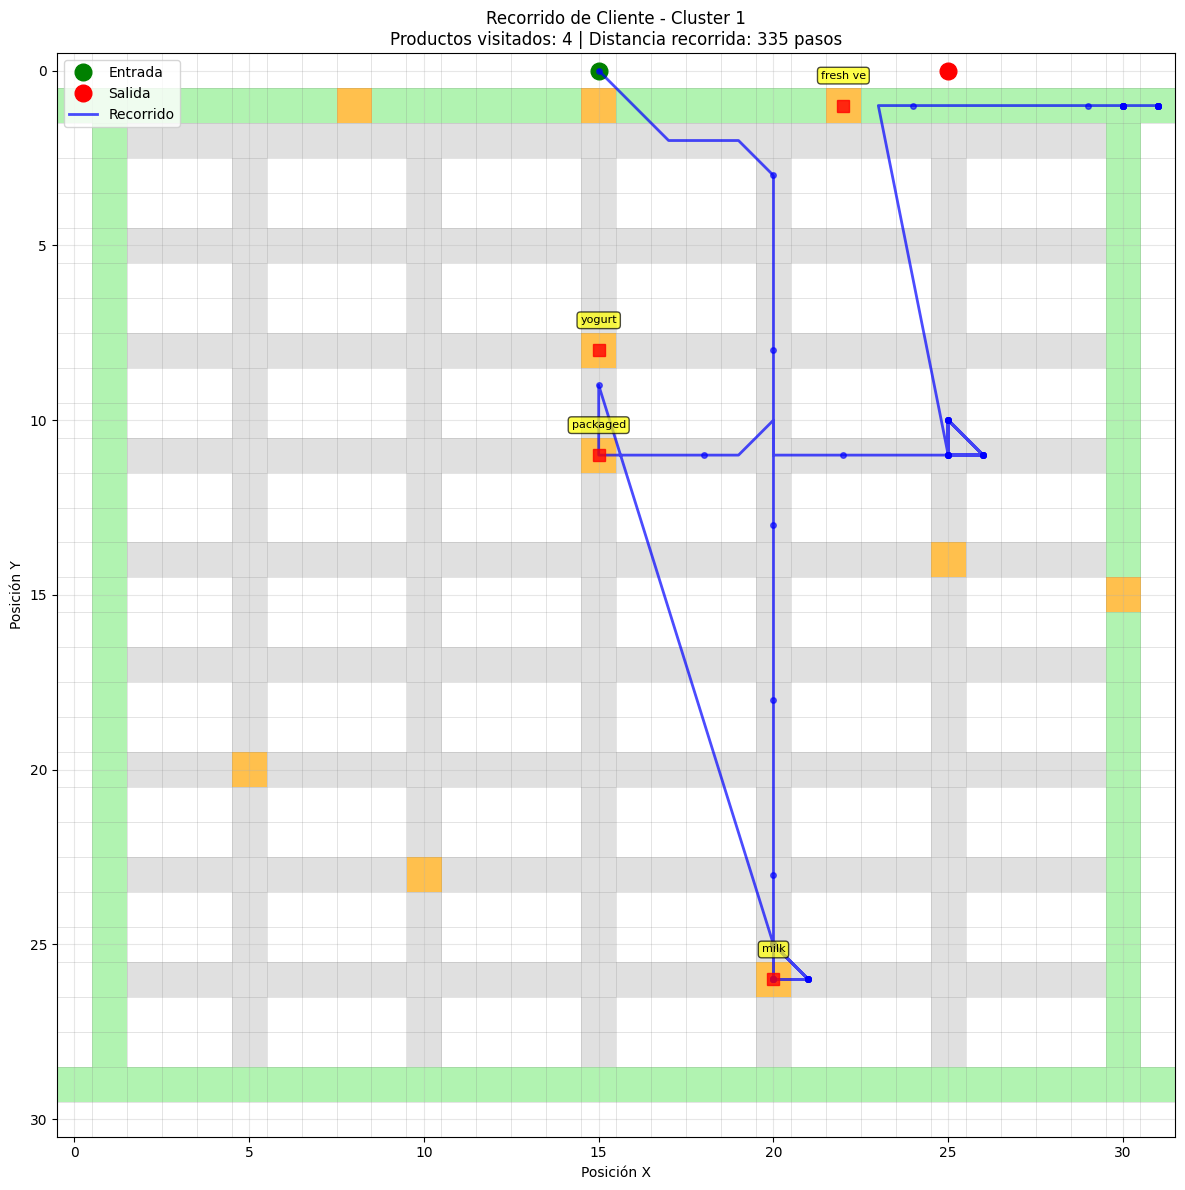


=== ANÁLISIS DE MÚLTIPLES RECORRIDOS ===
Estadísticas por Cluster:
        journey_length         products_visited       association_triggered  \
                  mean     std             mean   std                  mean   
cluster                                                                       
0               241.15   68.80             6.46  0.78                 43.00   
1               421.50  116.65             6.75  1.89                 33.75   
2               303.62   50.54             6.75  1.04                 54.50   
3               301.67   38.86             7.40  0.74                 51.87   
4               193.10   67.76             5.10  1.10                 41.40   

                
           std  
cluster         
0         3.72  
1        18.63  
2         5.35  
3         8.30  
4         7.66  


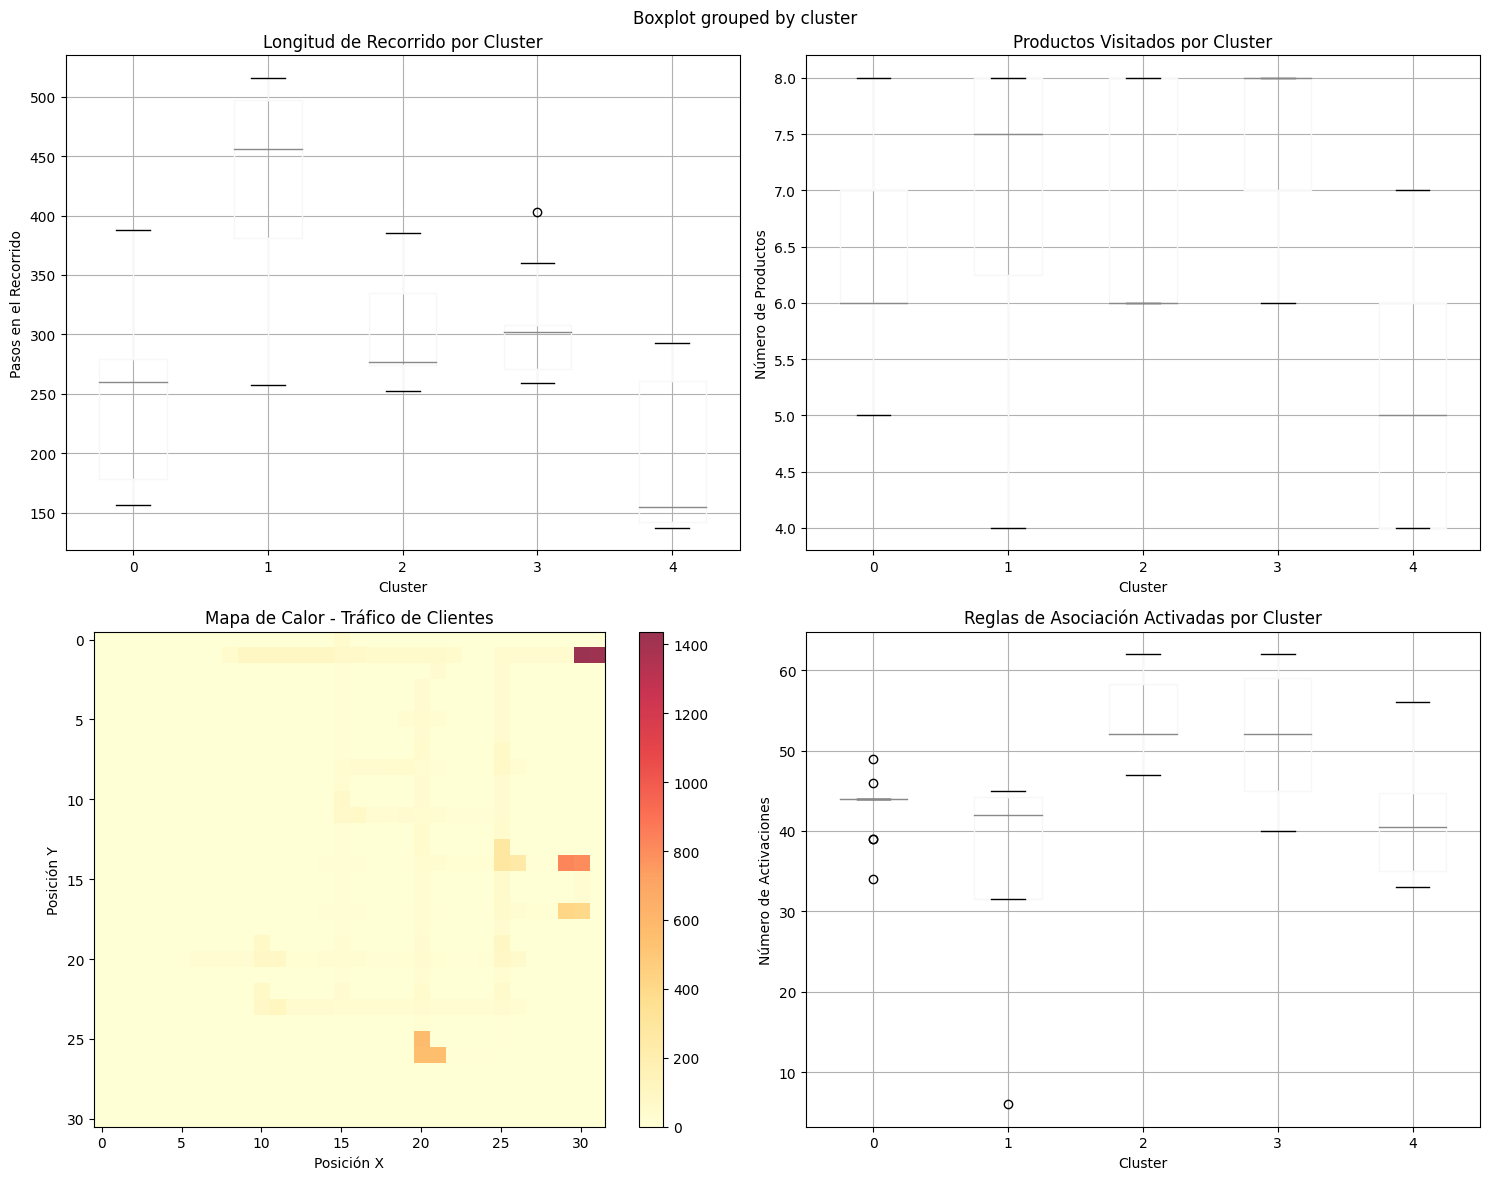

In [43]:
simulator, results, heatmap = run_store_simulation(aisles_counts, filtered_rules, cross_df)

In [33]:
user_clusters = pd.DataFrame({
    'user_id': cross_df.index,
    'cluster': c_preds
})
order_products_with_cluster = order_products.merge(user_clusters, on='user_id', how='inner')

KeyboardInterrupt: 

In [ ]:
hot_zones = (
    order_products_with_cluster.groupby(['cluster', 'aisle'])
    .size().reset_index(name='frequency')
)

top_aisles_per_cluster = (
    hot_zones.sort_values(['cluster', 'frequency'], ascending=[True, False])
    .groupby('cluster')
    .head(5)
)
aisle_freq = hot_zones.groupby('aisle')['frequency'].sum().sort_values(ascending=False).reset_index()

# Clasifica prioridades
def classify_priority(row, hot_cut=5, medium_cut=10):
    if row.name < hot_cut:
        return 'Hotzone'
    elif row.name < medium_cut:
        return 'Media'
    else:
        return 'Baja'

aisle_freq['Prioridad'] = aisle_freq.apply(classify_priority, axis=1)

# Puedes ajustar hot_cut/medium_cut al número de pasillos que quieras en cada categoría
print(aisle_freq)

In [ ]:
# Para cada pasillo, muestra clusters en los que está en el top 5
top5_per_cluster = (
    hot_zones.sort_values(['cluster', 'frequency'], ascending=[True, False])
    .groupby('cluster')
    .head(5)
)

# Agrupa clusters principales para cada pasillo
cluster_pasillo = top5_per_cluster.groupby('aisle')['cluster'].apply(list).reset_index()
tabla_prioridad = aisle_freq.merge(cluster_pasillo, on='aisle', how='left')
print(tabla_prioridad)

In [ ]:
main_cluster_per_aisle = (
    hot_zones.groupby('aisle')[['frequency', 'cluster']]
    .apply(lambda x: x.loc[x['frequency'].idxmax(), 'cluster'])
    .reset_index().rename(columns={0: 'main_cluster'})
)

In [ ]:
pasillos = main_cluster_per_aisle['aisle'].tolist()
clusters = main_cluster_per_aisle['main_cluster'].tolist()
aisle_to_cluster = dict(zip(pasillos, clusters))

# 1. Reunir todos los pasillos que salen en los vecindarios (para no duplicar)
pasillos_usados = set().union(*vecindarios) if vecindarios else set()

# 2. Pasillos que no están en ningún vecindario
pasillos_sueltos = [a for a in pasillos if a not in pasillos_usados]

# 3. Crea la lista final: primero todos los de vecindarios, luego los sueltos
pasillos_final = []
for grupo in vecindarios:
    pasillos_final += list(grupo)
pasillos_final += pasillos_sueltos


clusters_final = [aisle_to_cluster.get(a, -1) for a in pasillos_final]

# 5. Visualiza lo que obtuviste
print("Ejemplo de pasillos ordenados:", pasillos_final[:10])
print("Ejemplo de clusters ordenados:", clusters_final[:10])
print(f"Total de pasillos a acomodar: {len(pasillos_final)}")

In [ ]:
pasillos = main_cluster_per_aisle['aisle'].tolist()
clusters = main_cluster_per_aisle['main_cluster'].tolist()
n_pasillos = len(pasillos)

pd.Series(clusters).value_counts()
print("Conteo de clusters dominantes por pasillo:")
for c in sorted(set(clusters)):
    print(f"Cluster {c}: {clusters.count(c)} pasillos")

In [ ]:

all_clusters = [0, 1, 2, 3, 4]  # Ajusta si tienes otro número de clusters
cluster_colors = {
    0: '#f94144',   # rojo
    1: '#ffc0cb',   # azul
    2: '#f9c74f',   # amarillo
    3: '#43aa8b',   # verde
    4: '#9f86c0',   # lila
    -1: 'white'
}


n_pasillos = len(pasillos_final)
n_cols = int(np.ceil(np.sqrt(n_pasillos)))
n_rows = int(np.ceil(n_pasillos / n_cols))



cluster_grid = np.full((n_rows, n_cols), -1)
aisle_grid = np.full((n_rows, n_cols), '', dtype=object)

for idx, (pasillo, cluster) in enumerate(zip(pasillos, clusters)):
    row = idx // n_cols
    col = idx % n_cols
    if row < n_rows:
        cluster_grid[row, col] = cluster
        aisle_grid[row, col] = pasillo

fig, ax = plt.subplots(figsize=(n_cols*1.3, n_rows*1.3))
for i in range(n_rows):
    for j in range(n_cols):
        cluster = cluster_grid[i, j]
        color = cluster_colors.get(cluster, 'gray')
        rect = plt.Rectangle([j, i], 1, 1, facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        aisle = aisle_grid[i, j]
        if aisle:
            ax.text(j+0.5, i+0.5, aisle[:13], ha='center', va='center', fontsize=8, color='black')


ax.plot(0.5, 0.5, 'go', markersize=14, label="Entrada")
ax.plot(n_cols-0.5, n_rows-0.5, 'ro', markersize=14, label="Salida")
ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Grid de tienda: pasillos agrupados por afinidad (Apriori) y color por cluster')
ax.invert_yaxis()
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig("grid_pasillos.png")
plt.show()



In [ ]:
# Une info de cluster principal
hot_zones = hot_zones.merge(main_cluster_per_aisle, on='aisle', how='left')

# Ordena por main_cluster y frecuencia total
pasillos_ordenados = hot_zones.groupby('aisle')['frequency'].sum().reset_index()
pasillos_ordenados = pasillos_ordenados.merge(main_cluster_per_aisle, on='aisle')
pasillos_ordenados = pasillos_ordenados.sort_values(['main_cluster', 'frequency'], ascending=[True, False])

# Obtén lista ordenada de pasillos para el heatmap
aisle_order = pasillos_ordenados['aisle'].tolist()
